# Import Modules
You may need to install some of them.

In [8]:
using Revise, DeconvOptim, TestImages, Images, FFTW, Noise, ImageView

# custom image views
imshow_m(args...) = imshow(cat(args..., dims=3))
h_view(args...) = begin
    img = cat(args..., dims=2)
    img ./= maximum(img)
    colorview(Gray, img)
end

h_view (generic function with 1 method)

# Prepare Noisy Image and PSF

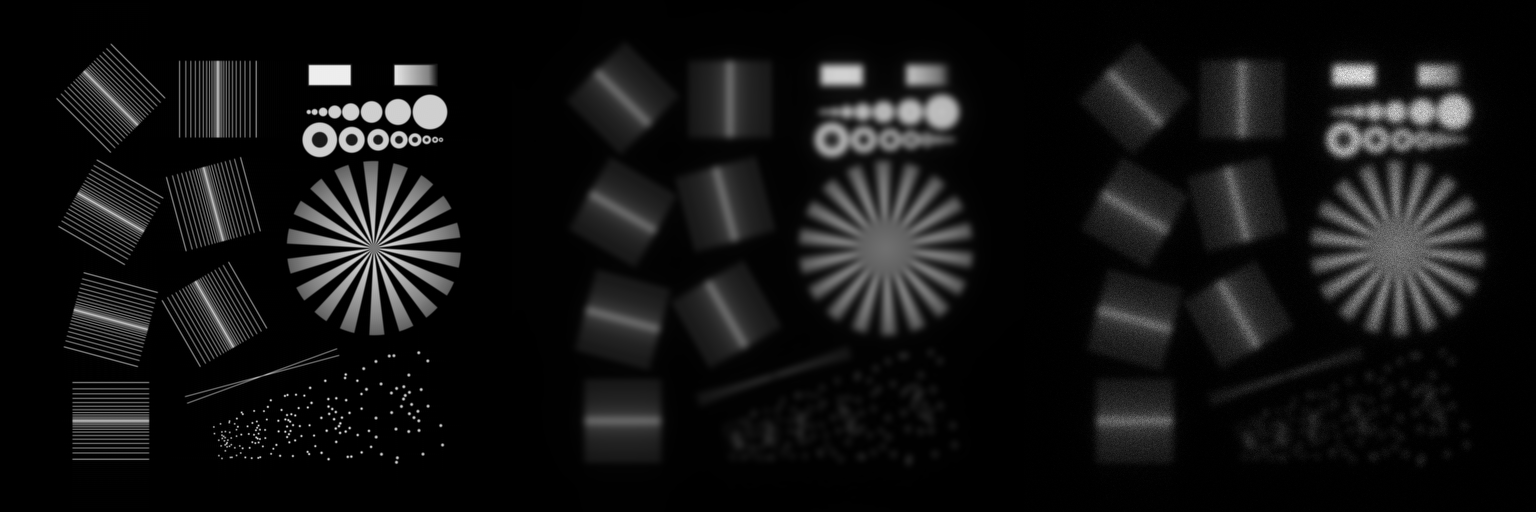

In [9]:
# load test images
img = convert(Array{Float32}, channelview(testimage("resolution_test_512")))

psf = generate_psf(size(img), 30)

# create a blurred, noisy version of that image
img_b = conv_psf(img, psf, [1, 2])
img_n = poisson(img_b, 300);

h_view(img, img_b, img_n)

# Let's test Good's roughness

 35.358900 seconds (238.48 M allocations: 26.728 GiB, 3.19% gc time)
optim_res =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     5.117548e+04

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 1.07e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 9.19e-05 ≰ 0.0e+00
    |f(x) - f(x')|         = 5.87e-08 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.15e-12 ≰ 0.0e+00
    |g(x)|                 = 1.27e-05 ≰ 1.0e-08

 * Work counters
    Seconds run:   35  (vs limit Inf)
    Iterations:    100
    f(x) calls:    302
    ∇f(x) calls:   302

  6.560047 seconds (37.81 M allocations: 4.265 GiB, 9.40% gc time)
optim_res =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     5.117627e+04

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 2.15e-02 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.87e-02 ≰ 0.0e

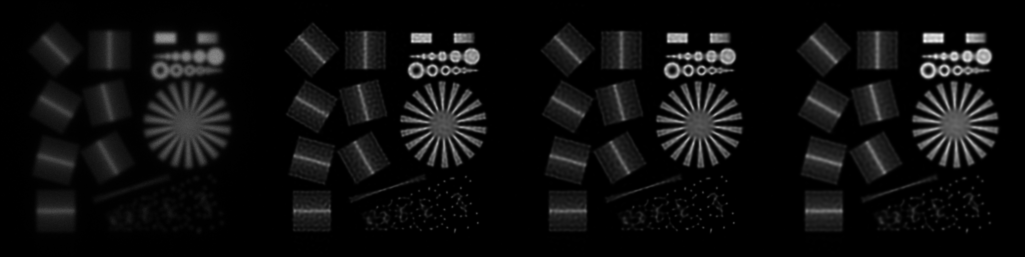

In [10]:
@time resGR100, optim_res = deconvolution(img_n, psf, regularizer=GR(), iterations=100)
@show optim_res

@time resGR15, optim_res = deconvolution(img_n, psf, regularizer=GR(), iterations=15)
@show optim_res

@time resGR15_2, optim_res = deconvolution(img_n, psf, λ=0.05, regularizer=GR(), iterations=15)
@show optim_res


h_view(img_n, resGR100, resGR15, resGR15_2)

# Let's test Total Variation

 15.698998 seconds (1.81 M allocations: 9.342 GiB, 2.03% gc time)
optim_res =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     5.206024e+04

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 4.17e-03 ≰ 0.0e+00
    |x - x'|/|x'|          = 4.31e-03 ≰ 0.0e+00
    |f(x) - f(x')|         = 2.97e-02 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 5.70e-07 ≰ 0.0e+00
    |g(x)|                 = 8.54e-02 ≰ 1.0e-08

 * Work counters
    Seconds run:   14  (vs limit Inf)
    Iterations:    50
    f(x) calls:    151
    ∇f(x) calls:   151

  6.092511 seconds (1.76 M allocations: 3.025 GiB, 2.22% gc time)
optim_res =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     5.206442e+04

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 1.87e-02 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.89e-02 ≰ 0.0e+00
 

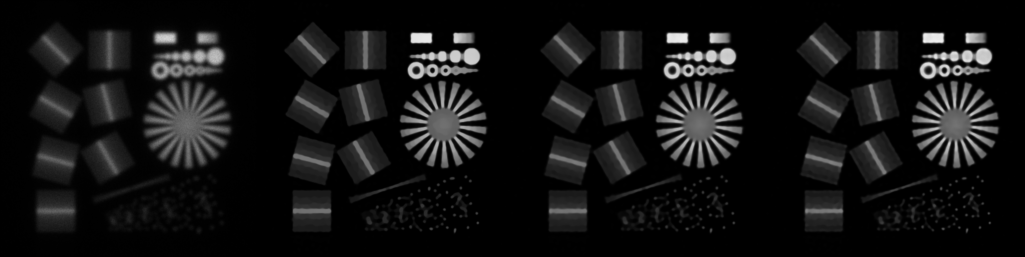

In [11]:
@time resTV50, optim_res = deconvolution(img_n, psf, regularizer=TV(), iterations=50)
@show optim_res
 
@time resTV15, optim_res = deconvolution(img_n, psf, regularizer=TV(), iterations=15)
@show optim_res
 
@time resTV15_2, optim_res = deconvolution(img_n, psf, λ=0.005, regularizer=TV(), iterations=15)
@show optim_res

h_view(img_n, resTV50, resTV15, resTV15_2)

# Let's test Tikhonov

  5.967972 seconds (1.82 M allocations: 3.027 GiB, 14.36% gc time)
optim_res =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     5.199514e+04

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 4.01e-02 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.53e-02 ≰ 0.0e+00
    |f(x) - f(x')|         = 5.69e-01 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.09e-05 ≰ 0.0e+00
    |g(x)|                 = 2.79e-02 ≰ 1.0e-08

 * Work counters
    Seconds run:   5  (vs limit Inf)
    Iterations:    15
    f(x) calls:    47
    ∇f(x) calls:   47

  5.775397 seconds (1.66 M allocations: 3.021 GiB, 2.53% gc time)
optim_res =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     5.199513e+04

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 4.02e-02 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.53e-02 ≰ 0.0e+00
   

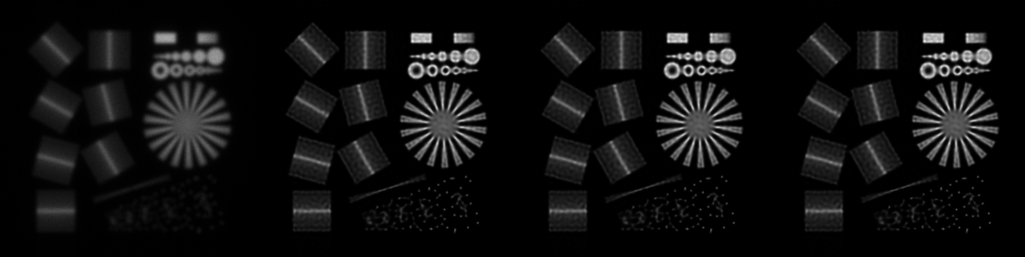

In [12]:
@time resTik1, optim_res = deconvolution(img_n, psf, λ=0.001, regularizer=Tikhonov(), iterations=15)
@show optim_res


@time resTik2, optim_res = deconvolution(img_n, psf, λ=0.0001, 
                    regularizer=Tikhonov(mode="spatial_grad_square"), iterations=15)
@show optim_res

@time resTik3, optim_res = deconvolution(img_n, psf, λ=0.0001, 
    regularizer=Tikhonov(mode="identity"), iterations=15)
@show optim_res

h_view(img_n, resTik1, resTik2, resTik3)

# Let's test without regularizer 

 13.305521 seconds (56.85 k allocations: 8.498 GiB, 4.90% gc time)
optim_res =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     5.199132e+04

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 2.08e-02 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.47e-02 ≰ 0.0e+00
    |f(x) - f(x')|         = 2.84e-02 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 5.46e-07 ≰ 0.0e+00
    |g(x)|                 = 1.23e-02 ≰ 1.0e-08

 * Work counters
    Seconds run:   13  (vs limit Inf)
    Iterations:    50
    f(x) calls:    148
    ∇f(x) calls:   148

  4.559099 seconds (18.29 k allocations: 2.757 GiB, 12.57% gc time)
optim_res =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     5.199493e+04

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 4.07e-02 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.57e-02 ≰ 0.0e+0

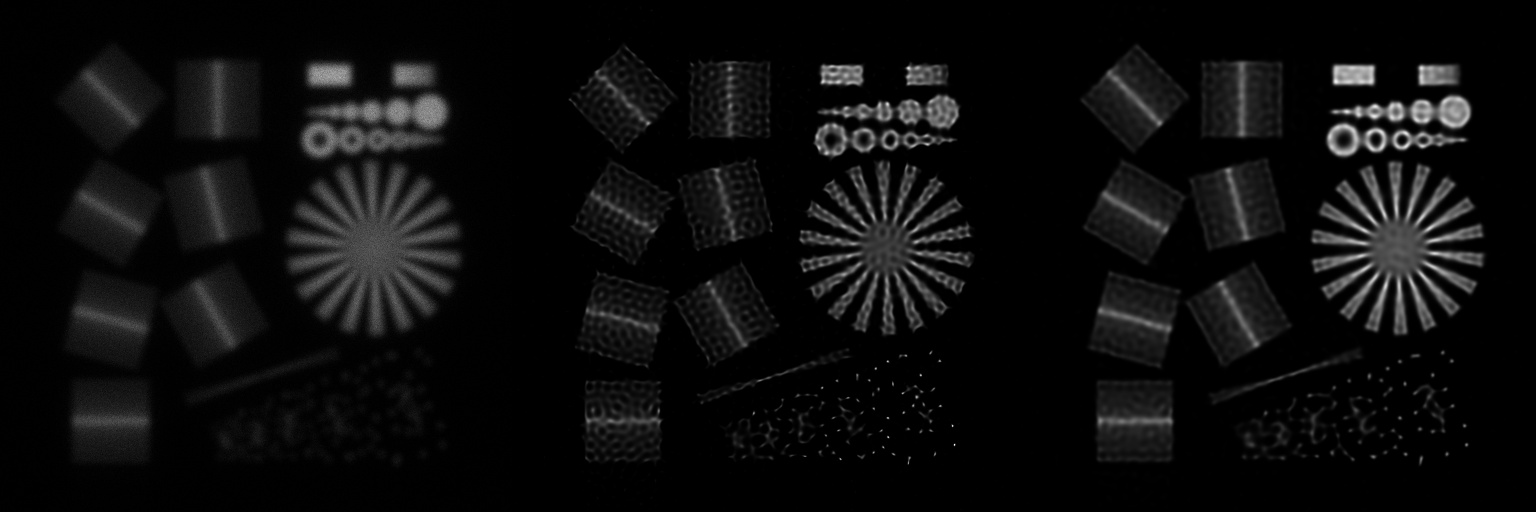

In [13]:
@time res100, optim_res = deconvolution(img_n, psf, regularizer=nothing, iterations=50)
@show optim_res

@time res15, optim_res = deconvolution(img_n, psf, regularizer=nothing, iterations=15)
@show optim_res

h_view(img_n, 0.7 .* res100, res15)

## Let's have a look at good results of some of the regularizers next to each other.

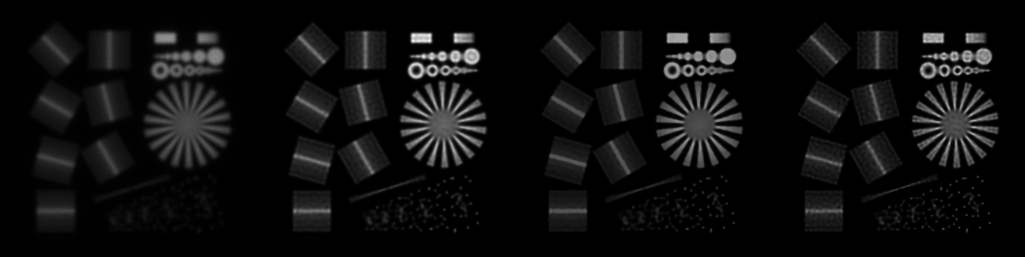

In [14]:
h_view(img_n, resGR15_2, resTV15_2, resTik3)